# Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from tensorflow.keras import regularizers

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

2024-10-09 07:23:21.475688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 07:23:21.495778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 07:23:21.499982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 07:23:21.512101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# fetcher dataset

In [2]:
fashion_mnist = keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

adding data Augmentation to fix 80% loss value

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train_full)

## splitting the data into training set and validation set

In [4]:
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# creating the models

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(32, 32, 3)))


model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# compiling the model

In [6]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# introducing callbacks

In [7]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10V2.keras", save_best_only=True)

# Training the model

In [8]:
# Train the model
history = model.fit(X_train_full, y_train_full, epochs=100, batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100


I0000 00:00:1728458608.447974    1659 service.cc:146] XLA service 0x7f0c28005cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728458608.448032    1659 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-10-09 07:23:28.532106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-09 07:23:28.988149: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


  23/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1416 - loss: 3.1282

I0000 00:00:1728458613.663382    1659 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3394 - loss: 1.8957 - val_accuracy: 0.5002 - val_loss: 1.3981
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5847 - loss: 1.1965 - val_accuracy: 0.6637 - val_loss: 0.9429
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6852 - loss: 0.9226 - val_accuracy: 0.6794 - val_loss: 0.9498
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7464 - loss: 0.7499 - val_accuracy: 0.7163 - val_loss: 0.8715
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7886 - loss: 0.6260 - val_accuracy: 0.7478 - val_loss: 0.7865
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8275 - loss: 0.5075 - val_accuracy: 0.7583 - val_loss: 0.8043
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8560 - loss: 0.4245 - val_accuracy: 0.7422 - val_loss: 0.9810
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8797 - loss: 0.3524 - v

# showing validation of model

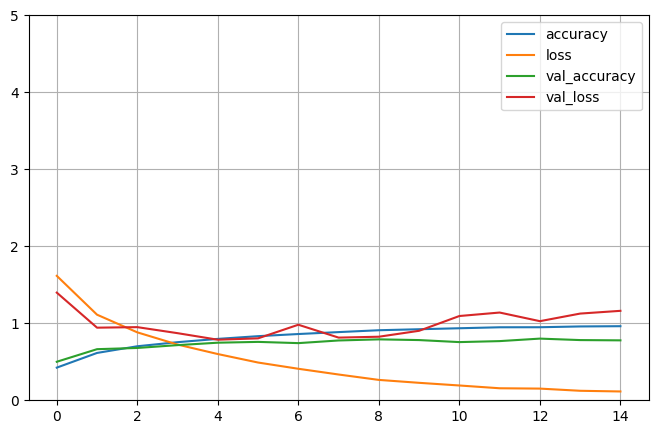

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7471 - loss: 0.7932


[0.804632306098938, 0.7409999966621399]

# saving the model for checkpoint usage

In [11]:
model.save("cifar10V2.keras")

In [12]:
model = keras.models.load_model("cifar10V2.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Original label is airplane and predicted label is deer


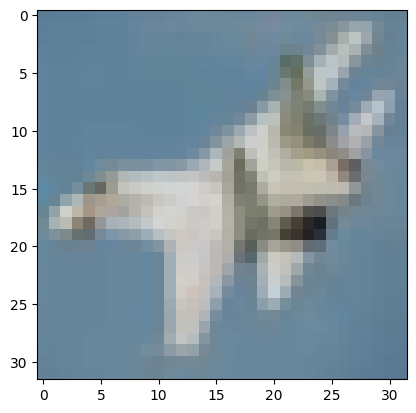

In [13]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

image_number = 10

plt.imshow(X_test[image_number])

n = np.array(X_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(p).argmax()]

# Assuming y_test is one-hot encoded, convert it to a scalar label
original_label = labels[y_test[image_number][0]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))